# Parallel- und Zentralprojektionen

## Auftrag
**Autor:** Gregor von Flüe  

In dieser Aufgabe geht es darum, zwei Funktion zu schreiben, die im Raum $\mathbb{R}^3$ ein Parallelepiped mit Parallelprojektionen und Zentralprojektionen jeweils auf die xy-Ebene projiziert. Ein Parallelopied ist ein Körper der aus sechs deckungsgleichen in parallelen Ebenen liegenden Parallelogrammen begrenzt wird. Die Parallelprojektion wird mit einer Funktion `parallelprojektion` umgesetzt welche als Argumente ein Parallelepiped und einen Richtungsvektor besitzt. Die Zentralprojektion `zentralprojektion` besitzt nebst dem Parallelpiped ein Projektionszentrum als zusätzlichen Paramenter. Beide Funktionen erstellen eine Matplotlib-Graphik.

### Umgebung
Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.

* Matplotlib [1]
* NumPy [2]

In [159]:
# pip install matplotlib

In [160]:
# pip install numpy

## Theorie
In diesem Kapitel wird der theoretische Teil aufgeführt welcher für die Anwendungspeispiele relevant ist.

### Parallelepiped
Bei dieser Arbeit wird mit einem Parallelpiped gearbeitet, welches über vier Parameter eindeutig definierbar ist. Es besteht aus einem Eckpunkt $P_{Eckpunkt}$ und drei Kantenvektoren $\vec{a}$, $\vec{b}$ und $\vec{c}$ welche aus dem Eckpunkt drei Parallelogramme aufspannen. Die drei Kantenvektoren müssen jedoch linear unabhängig zueinander sein, ansonsten entsteht ein Quader. Zu jedem Parallelogramm, wird eine deckungsgleiche und parallele Seite hinzugefüght [3].  
Um die lineare Unabhängigkeit zu prüfen wird das Gausche Eliminationsverfahren angewedet. Dazu werden die drei Kantenvektoren zu einer quadratischen $3x3$-Matrix $A$ zusammen gefasst. Wenn nun die Matrix $A$ regulär ist sind die Kantenvektoren linear unabhängig. Ist jedoch die Matrix $A$ singulär sind die Kantenvektoren linear abhängig und die Determinate von $A$ ist 0 [4].  
![Bild 1](img/Parallelepiped.png)
[Bild 1] Parallelepiped, [Wikipedia](https://de.wikipedia.org/wiki/Parallelepiped#/media/Datei:Parallelepiped-v.svg)

### Parallelprojektion
Bei einer Parallelprojektion werden alle Punkte eines Körpers im dreidimensionalen Raumf auf eine gegebene Ebene projieziert. Dabei sind die Projektionsstrahlen zueinander parallel.  
Ein Punkt $p$ ist im dreidimensionalen Raum wie folgt definiert: $p = \begin{pmatrix}
x \\
y \\
z \\
\end{pmatrix}$ Dieser Punkt wird durch einen Richtungsvektor $\vec{r} = \begin{pmatrix}
r_x \\
r_y \\
r_z \\
\end{pmatrix}$ auf die xy-Ebene projiziert. Demendsprechend ist der projizierte Punkt $p'$ wie folgt definiert: $p' = \begin{pmatrix}
x' \\
y' \\
0 \\
\end{pmatrix}$ Im zweidimensionalen Raum ist $z' = 0$. Die Eckpunkte des Parallelepiped sind mit Katenvektoren miteinander verbunden welche über die Geradengleichung g auf die Ebende projiziert wird: $g:\{p+\lambda*\vec{r}\}$ 
Die Geradengleichung kann nach $\lambda$ aufgelöst werden.

$$z+\lambda*r_z=0$$
$$\lambda=-\frac{z}{r_z}$$

Daraus wird ein lineares Gelichungssystem erstellt, welches verwendet wird um die Abbildungsmatrix $A$ zu bestimmen.  

$$x'=x+0*y+z*(-\frac{r_x}{r_z})$$
$$y'=0*x+y+z*(-\frac{r_y}{r_z})$$
$$z'=0*x+0*y+0*z$$

Das lineare Gleichungssystem definiert nun die Abbildungsmatrix $A = \begin{pmatrix}
1 & 0 & -\frac{r_x}{r_z} \\
0 & 1 & -\frac{r_y}{r_z} \\
0 & 0 & 0 \\
\end{pmatrix}$ mittels dieser Abbildungsmatrix können sämtliche Punkte des Parallelepipes in Richtung $\vec{r}$ ausgerechnet werden: $p'=A*p$  
Jedoch darf die Komponente $r_z$ im Richtungsvektor $\vec{r}$ nicht null sein, anonsten zeigt der Richtungsvektor nie auf die xy-Ebene und es ist eine Projektion ins Unendliche [4].

### Zentralprojektion
Bei der Zentralprojektion wird ein Körper nicht durch paralele Strahlen auf eine Ebene projiziert, sondern es wird ein  Projektionszentrum $Z= \begin{pmatrix}
x_0 \\
y_0 \\
z_0 \\
\end{pmatrix}$ verwendet. Durch diesen festen Punkt $z$ verlaufen alle Projektionsgeraden. Die Abbildung funktioniert ähnlich wie bei einer Parallelprojektion, nur ist der Richtungsvektor $\vec{r}$ für jeden Punkt anderst. Somit ist der Richtungsvektor wie folgt definiert: $\vec{r}=p-Z$
Welches die folgende Geradengleichung ergibt: $g:\{Z+\lambda*(p-Z)\}$
Wie bei der Parallelprojektionwird für die z-Koordinate $\lambda$ ausgerechnet.

$$z_0+\lambda*(z-z_0)=0$$
$$\lambda=\frac{-z_0}{z-z_0}=\frac{z_0}{z_0-z}=\frac{1}{1-\frac{z}{z_0}}$$

Mittels dem berechneten $\lambda$ können die Projektionspunkte $x'= \frac{x-\frac{z*x_0}{z_0}}{1-\frac{z}{z_0}}$, $y'=\frac{y-\frac{z*y_0}{z_0}}{1-\frac{z}{z_0}}$ und $z'=\frac{0}{1-\frac{z}{z_0}}=0$ berechnet werden. Um nun den projizierten Punkt $p'$ zu berechnen, wird bei den homogenen Koordinaten die in der vierte Zeile eingefühgen Wert $a$ jeweils mit den anderen Koordinaten multipliziert. Dabei handelt es sich hier um den Wert $a=1-\frac{z}{z_0}$, welcher sich bei Projektionspunkt unter dem Bruchstrich befindet. Daraus kann ein lineares Gleichungsystem erstellt werden welches wieder zu einer Abbildungsmatrix $A$ bestimmt.

$$p'=\begin{pmatrix}
x'*a \\
y'*a \\
z'*a \\
a \\
\end{pmatrix}=\begin{pmatrix}
x'*1-\frac{z}{z_0} \\
y'*1-\frac{z}{z_0} \\
z'*1-\frac{z}{z_0} \\
1-\frac{z}{z_0} \\
\end{pmatrix}=\begin{pmatrix}
\frac{x-\frac{z*x_0}{z_0}}{1-\frac{z}{z_0}}*(1-\frac{z}{z_0}) \\
\frac{y-\frac{z*y_0}{z_0}}{1-\frac{z}{z_0}}*(1-\frac{z}{z_0}) \\
0*(1-\frac{z}{z_0}) \\
1-\frac{z}{z_0} \\
\end{pmatrix}=\begin{pmatrix}
x+0*y-z*\frac{x_0}{z_0}+0 \\
0*x+y-z*\frac{y_0}{z_0}+0 \\
0*x+0*y+0*z*+0 \\
0*x+0*y-z*\frac{1}{z_0}+1 \\
\end{pmatrix}$$

Somit ergibt sich eine Abbildungsmatrix $A=\begin{pmatrix}
1 & 0 & -\frac{x_0}{z_0} & 0 \\
0 & 1 & -\frac{y_0}{z_0} & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & -\frac{1}{z_0} & 1 \\
\end{pmatrix}$ mit welcher erneut sämtliche Punkte des Parallelpipes mit einem Projektsionszentrum $Z$ durch $p'=A*p$ berechnet werden können. Wie bei der Parallelprojektion darf die Komponente $z_0$ nicht gleich Null sein. Wäre dies der Fall, so würde aus dieser Kameraperspektive welche auf der xy-Ebene liegt und von dieser Stelle wird weggeschaut. Somit würde nichts dargestellt werden [4].

## Implementierung
Die Implementierung der zwei Projektionsvarianten wird in drei Teile aufgeteilt. Zu Beginn wird eine Klasse `Parallelepiped` geschrieben, welche ein Parallelepiped anhand eines Eckpunktes und drei Kantenvektoren die restlichen Kooridnaten berechnet. Des weiteren kann diese Klasse ein Parallelpiped aus allen Eckpunkten erstellen. Danach wird eine Methode `grafik_zeichnen` geschrieben, welche ein Parallelepiped-Objket und deren Projektion grafisch darstellt. Zum Schluss werden die zwei Projektionsmethoden `parallelprojektion` und `zentralprojektion` geschrieben, welche die forherigen Kapitel beschriebenen Projektionen durchführen.

### Parallelepiped
Im darauffolgenden Snippet ist der Code der Klasse `Parallelepiped` vorzufinden.

In [2]:
import numpy as np


class Parallelepiped:
    """
    Enthält die Koordinatendaten eines Parallelepiped.
    """
    
    def __init__(self, P = np.array([2,2,2]), a = np.array([2,0,0]), b = np.array([2,0,2]), c = np.array([0,2,0]), is_projektion = False):
        """
        Konstruktor für die Erstellung eines Parallelepiped.
        @param: self: Objektreferenz
        @param: P: Eckpunkt des Parallelepiped, Standartwert (2,2,2)
        @param: a: Kantenvektor a, Standartwert (2,0,0)
        @param: b: Kantenvektor b, Standartwert (2,0,2)
        @param: c: Kantenvektor c, Standartwert (0,2,0)
        @param: is_projektion: Legt fest ob die Koordinatendaten des Parallelpiped von einer Projiektion stammen, Standartwert falsch
        """
        
        if np.linalg.det([a, b, c]) == 0 and not is_projektion:
            raise ValueError('Die Kantenvektoren sind linear abhängig.')
        
        P0 = P
        P1 = P0 + a
        P2 = P1 + b
        P3 = P0 + b
        P4 = P0 + c
        P5 = P1 + c
        P6 = P2 + c
        P7 = P3 + c
        self.update(np.array([P0, P1, P2, P3, P4, P5, P6, P7]))

    def update(self, punkte):
        """
        Definiert und aktualisiert alle acht Eckpunkte und zwölf Kanten.
        @param: self: Objektreferenz
        @param: punkte: Eine Liste welche die acht Eckpunkten eines Parallelepiped enhält
        """
        self.punkte = punkte
        self.kanten = [np.array([punkte[0], punkte[1]]), 
                    np.array([punkte[0], punkte[3]]), 
                    np.array([punkte[0], punkte[4]]),  
                    np.array([punkte[1], punkte[2]]),  
                    np.array([punkte[1], punkte[5]]), 
                    np.array([punkte[2], punkte[3]]), 
                    np.array([punkte[2], punkte[6]]), 
                    np.array([punkte[3], punkte[7]]), 
                    np.array([punkte[4], punkte[5]]), 
                    np.array([punkte[4], punkte[7]]), 
                    np.array([punkte[5], punkte[6]]), 
                    np.array([punkte[6], punkte[7]])]

    @staticmethod
    def neu(punkte):
        """
        Erstellt ein neues Parallelepiped Objekt.
        @param: punkte: Eine Liste welche die acht Eckpunkten eines Parallelepiped enhält
        """

        parallelepiped = Parallelepiped(is_projektion = True)
        parallelepiped.update(punkte) 
        return parallelepiped

### Grafik erstellen
Im darauffolgenden Snippet ist der Code aufzufinden, welcher ein Parallelepiped und deren Abbildung grafisch darstellt.

In [3]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.patches import Rectangle, PathPatch
from abc import ABC, abstractmethod


class Config(ABC):
    """
    Enthält die Informationen um ein Parallelepiped und deren Projektion grafisch Dahrzustellen.
    """
    
    def __init__(self, parallelepiped, projektion):
        """
        Konstruktor für die Erstellung einer Config.
        @param: self: Objektreferenz
        @param: parallelepiped: Parallelepiped Objekt
        @param: projektion: Projektion des Parallelpiped Objekt
        """
        
        self.parallelepiped = parallelepiped
        self.projektion = projektion
        
    def get_objekte(self):
        """
        Gibt die Parallelepiped Objekte mit einer definierten Farbe zurück.
        @param: self: Objektreferenz
        """
        return zip([self.parallelepiped, self.projektion], ['b', 'c'])

    @property
    def parallelepiped_punkt_null(self):
        """
        Enhählt die Koordinaten des Punkt P (Eckpunkt).
        @param: self: Objektreferenz
        """
        
        return self.parallelepiped.punkte[0]
        
    @property
    def projektion_punkt_null(self):
        """
        Enhählt die Koordinaten des Punkt P (Eckpunkt) der Projektion.
        @param: self: Objektreferenz
        """
        
        return self.projektion.punkte[0]
    
    @abstractmethod
    def get_start_und_ende(self):
        """
        Berechnung einer Geraden mit Start- und Endekoordinaten um anhand des Punktes P (Eckpunkt) die Projektion aufzuzeigen.
        Spezifische Implementierung in den jeweiligen Subklassen.
        @param: self: Objektreferenz
        """
        pass


class Parallelprojektion(Config):
    """
    Spezifische Konfiguration einer Parallelprojektion.
    """
    
    def __init__(self, parallelepiped, projektion, r):
        """
        Konstruktor für die Erstellung einer Parallelprojektion.
        @param: self: Objektreferenz
        @param: parallelepiped: Parallelepiped Objekt
        @param: projektion: Projektion des Parallelpiped Objekt
        @param: r: Richtungsvektor der Parallelprojektion
        """
        
        Config.__init__(self, parallelepiped, projektion)
        self.r = r
        self.title = f'Parallelprojektion mit r = [{r[0]},{r[1]},{r[2]}]'

    def get_start_und_ende(self):        
        start = self.parallelepiped_punkt_null
        ende = self.projektion_punkt_null - start
        return start, ende
    

class Zentralprojektion(Config):
    """
    Spezifische Konfiguration einer Zentralprojektion.
    """
    
    def __init__(self, parallelepiped, projektion, Z):
        """
        Konstruktor für die Erstellung einer Zentralprojektion.
        @param: self: Objektreferenz
        @param: parallelepiped: Parallelepiped Objekt
        @param: projektion: Projektion des Parallelpiped Objekt
        @param: Z: Projektionszentrum der Parallelprojektion
        """
        
        Config.__init__(self, parallelepiped, projektion)
        self.Z = Z
        self.title = f'Zentralprojektion mit Z = [{Z[0]},{Z[1]},{Z[2]}]'
    
    def get_start_und_ende(self):
        start = self.parallelepiped_punkt_null
        if (self.Z[2] > start[2] and start[2] > 0) or (self.Z[2] < start[2] and start[2] < 0):
            return self.Z, self.projektion_punkt_null - self.Z
        elif (start[2] < 0 and self.Z[2] > 0) or (start[2] > 0 and self.Z[2] < 0):
            return self.Z, start - self.Z
        else:
            return start, self.projektion_punkt_null - start
        
    
def grafik_zeichnen(config): 
    """
    Erstellt eine Grafik anhand der Projektionskonfiguration.
    @param: config: Projektionskonfiguration
    """
    
    # Grafik erzeugen und Beschriften.
    fig = plt.figure(figsize=(4, 4), dpi = 100)
    ax = fig.gca(projection='3d')
    
    plt.title(config.title)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    fig.tight_layout()

    # Den ersten und zweiten Parallelepiped, die als Parameter übergeben wurden, plotten
    for koerper, color in config.get_objekte():
        # Eckpunkte und Kanten in die Grafik zeichnen.
        ax.scatter3D(koerper.punkte[:,0], koerper.punkte[:,1], koerper.punkte[:,2], color='r')
        ax.add_collection(Line3DCollection(koerper.kanten, color=color))
        
    # Hilfspfeil in die Grafik zeichnen für Punkt 0.
    start, ende = config.get_start_und_ende()
    ax.quiver(start[0], start[1], start[2], ende[0], ende[1], ende[2], color = 'black', linestyle = '--', linewidth = 1)
        
    if isinstance(config, Zentralprojektion):
        # Punkt mit Beschriftung für das Projektionszentrum erstellen
        ax.scatter3D(config.Z[0], config.Z[1], config.Z[2], color='black')
        ax.text(config.Z[0], config.Z[1], config.Z[2], '$Z$')

    plt.show() 

### Projektionen
In den darauffolgenden zwei Snippets sind die Methoden vorzufinden, welche eine Paralleleprojektion und Zetralprojektion vornehmen

In [4]:
def parallelprojektion(parallelepiped, r):
    """
    Führt auf das Parallelepiped eine Parallelprojektion durch und erstellt eine Grafik.
    @param: parallelepiped: Parallelepiped auf welches eine Parallelprojektion durchgeführt wird
    @param: r: Richtungsvektor der Parallelprojektion
    """
    
    # Richtungsvektor Komponente rz darf nicht 0 sein.
    if r[2] == 0:
        raise ValueError("Richtungsvektor ermöglicht keine Projektion in die xy-Ebene.")

    # Abbildungsmatrix.
    A = np.matrix([
        [1, 0, -r[0]/r[2]],
        [0, 1, -r[1]/r[2]],
        [0, 0, 0]
    ])
    
    # Eckpunkte des Parallelpiped mit der Abbildungsmatrix verschieben.
    punkte = [np.dot(A, punkt).getA()[0] for punkt in parallelepiped.punkte]
    projektion = Parallelepiped.neu(np.asanyarray(punkte))
    
    grafik_zeichnen(Parallelprojektion(parallelepiped, projektion, r))

In [5]:
def zentralprojektion(parallelepiped, Z):
    """
    Führt auf das Parallelepiped eine -zentralprojektion durch und erstellt eine Grafik.
    @param: parallelepiped: Parallelepiped auf welches eine Zentralprojektion durchgeführt wird
    @param: Z: Projektionszentrum durch den die Projektion geht
    """
    
    # Projektionszentrum Komponente z0 darf nicht 0 sein.
    if Z[2] == 0:
        raise ValueError("Mit diesem Richtungsvektor ist keine Projektion auf die xy-Ebene möglich!")
    
    # Abbildungsmatrix.
    A = np.matrix([
        [1, 0, -Z[0]/Z[2], 0],
        [0, 1, -Z[1]/Z[2], 0],
        [0, 0, 0, 0],
        [0, 0, -1/Z[2], 1]
    ])
        
    # Berechnung neuer Punkte inkl. Umrechnung in affine Koordinaten
    affine_punkte = [np.dot(A, np.append(punkt, 1)).getA()[0] for punkt in parallelepiped.punkte]
    punkte = [(punkt / punkt[3])[:3] for punkt in affine_punkte]      
    projektion = Parallelepiped.neu(np.asanyarray(punkte))
    
    grafik_zeichnen(Zentralprojektion(parallelepiped, projektion, Z[:3]))

## Anwendungsbeispiele


### Parallelprojektion
Alle roten Punkte des türkiesen Körper liegen auf der xy-Ebene. Das blaue Parallelepiped wird sozusagen auf die xy-Ebene mit der Richtung $\vec{r}$ gedrückt. Bei deinem Richtungsvektor $\vec{r}=\begin{pmatrix}
0 \\
0 \\
1 \\
\end{pmatrix}$ sieht man das Parallelepiped so, wie wenn der Beobachter genau dafor steht. Dies ist in der folgenden Abbildung ersichtlich.

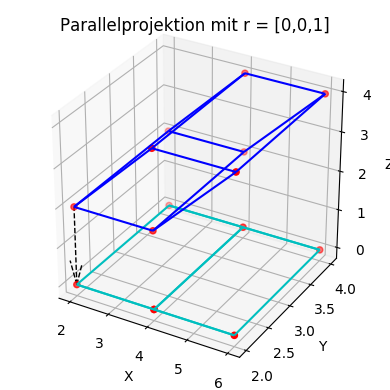

In [13]:
parallelprojektion(Parallelepiped(), np.array([0,0,1]))

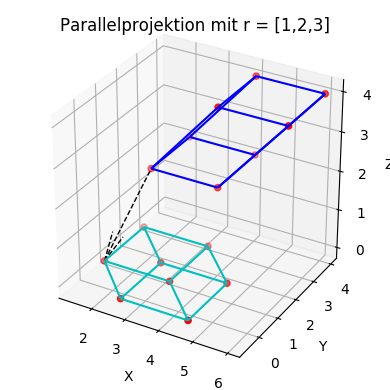

In [14]:
parallelprojektion(Parallelepiped(), np.array([1,2,3]))

Je nach dem welche Form der Richtungsvekotr $\vec{r}$ animmt, gibt es eine andere Form auf der xy-Ebende. Dies kann wie das verschieben des Blickwinkels des Beobachter auf die Ebene betrachtet werden. Jedoch nimmt ihr die Form des Parallelepiped auf der xy-Ebene Formen an, welche nicht den unseren Bekanten gesetze dient. Daher wird hier die Zentralprojektion benötigt.

### Zentralprojektion
Der Beobachter stet auf dem Projektionszentrum $Z$ und schaut in richtung der xy-Ebene. Der Beobachter sieht nun das blaue Parallelepiped vom Punkt $Z$ so wie die türckische zweidimensionale Form.

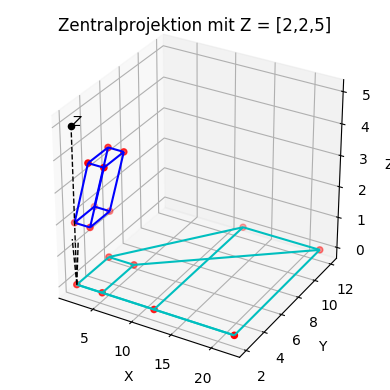

In [25]:
zentralprojektion(Parallelepiped(), np.array([2,2,5]))

## Fazit
An einem Parallelepiped eine Parallel- und Zentralprojektion durchzuführen war eine ansprechende und interessante Aufgabe. Dadurch konnten die Lernziele des Blockes sehr gut vertieft werden.  
Matplotlib ist wie bei der 2D-Visualisierung auch bei der 3D-Visualisierung ein geeignetes Tool, mit welchem einfach und schnell erste Grafiken erzeugt werden können.

## Literaturverzeichnis
[1] Matplotlib. (2020). Matplotlib. Abgerufen am 07.05.2020 von https://matplotlib.org/  
[2] NumPy Developers. (2020). NumPy. Abgerufen am 07.05.2020 von https://numpy.org/  
[3] Konrad Königsberger. (2004) Analysis. Springer-Verlag Berlin Heidelberg.  
[4] G. Teschl, S. Teschl. (2014) Mathematik für Informatiker. Springer-Verlag Berlin Heidelberg.  